In [14]:
import pandas as pd

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",color_codes=True)

In [17]:
from sklearn.datasets import load_iris

In [18]:
iris=load_iris()

In [19]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [30]:
#df["sepal length(cm)"].value_counts()
id_column=[[i+1] for i in range(150)]

In [31]:
id_column=pd.DataFrame(id_column)

In [34]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [40]:
species_col=[[iris.target_names[iris.target[i]]] for i in range(150)]

In [41]:
species_col=pd.DataFrame(species_col)

In [47]:
data=pd.concat([id_column,df,species_col],axis=1)

In [49]:
data.columns=["id","sepal_length","sepal_width","petal_length","petal_width","species"]

In [53]:
c_counts=data["sepal_length"].value_counts()#计数

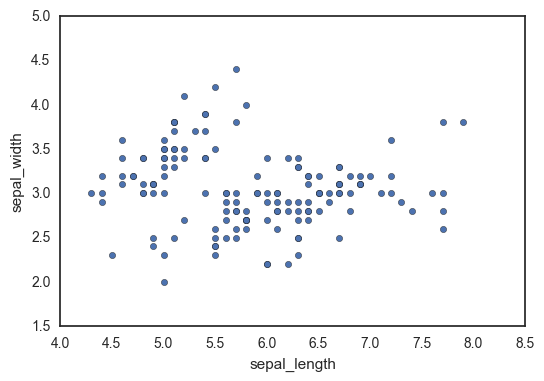

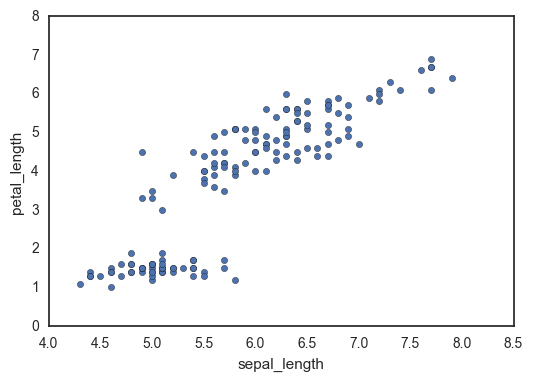

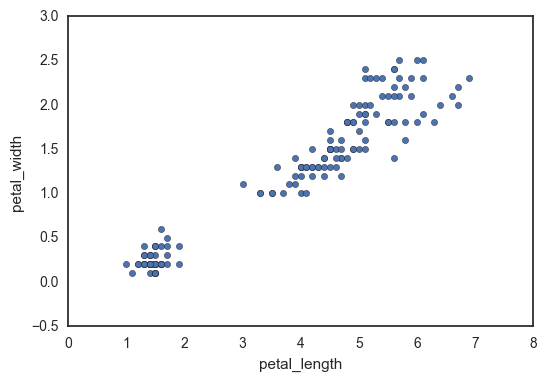

In [59]:
%matplotlib inline
data.plot(kind="scatter",x="sepal_length",y="sepal_width")
data.plot(kind="scatter",x="sepal_length",y="petal_length")
data.plot(kind="scatter",x="petal_length",y="petal_width")

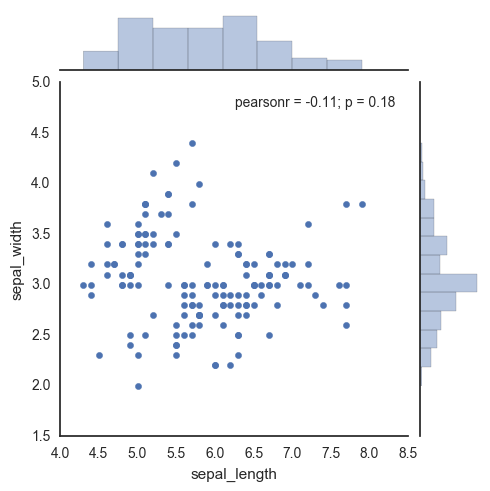

In [61]:
sns.jointplot(x="sepal_length",y="sepal_width",data=data,size=5)

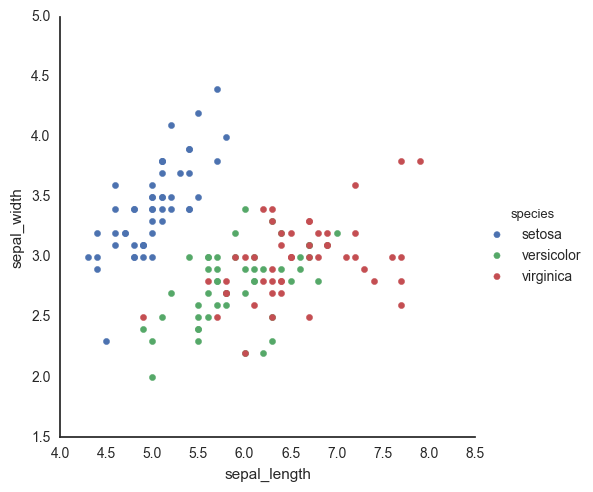

In [62]:
sns.FacetGrid(data,hue="species",size=5).map(plt.scatter,"sepal_length","sepal_width").add_legend()

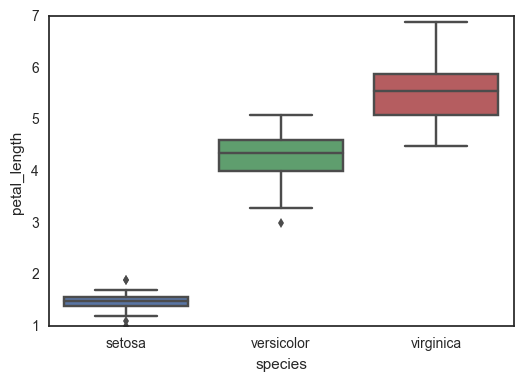

In [63]:
sns.boxplot(x="species",y="petal_length",data=data)

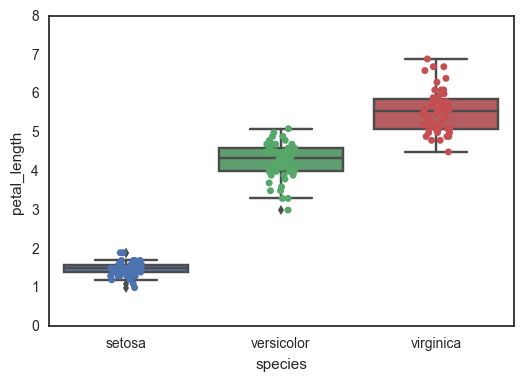

In [67]:
ax=sns.boxplot(x="species",y="petal_length",data=data)
ax=sns.stripplot(x="species",y="petal_length",data=data,jitter=True,edgecolor="gray")

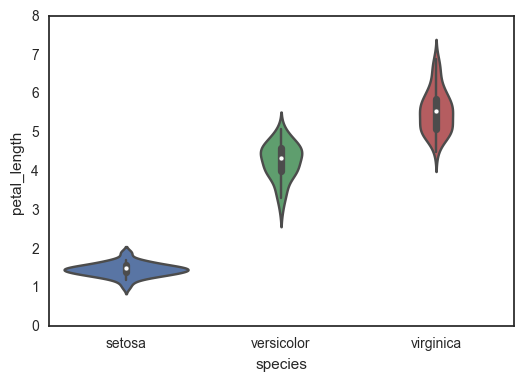

In [68]:
sns.violinplot(x="species",y="petal_length",data=data,size=6)

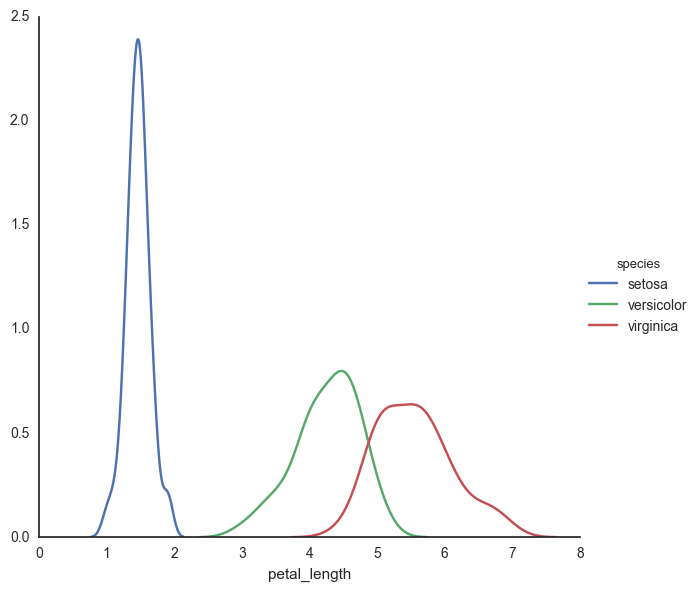

In [70]:
sns.FacetGrid(data,hue="species",size=6).map(sns.kdeplot,"petal_length").add_legend()

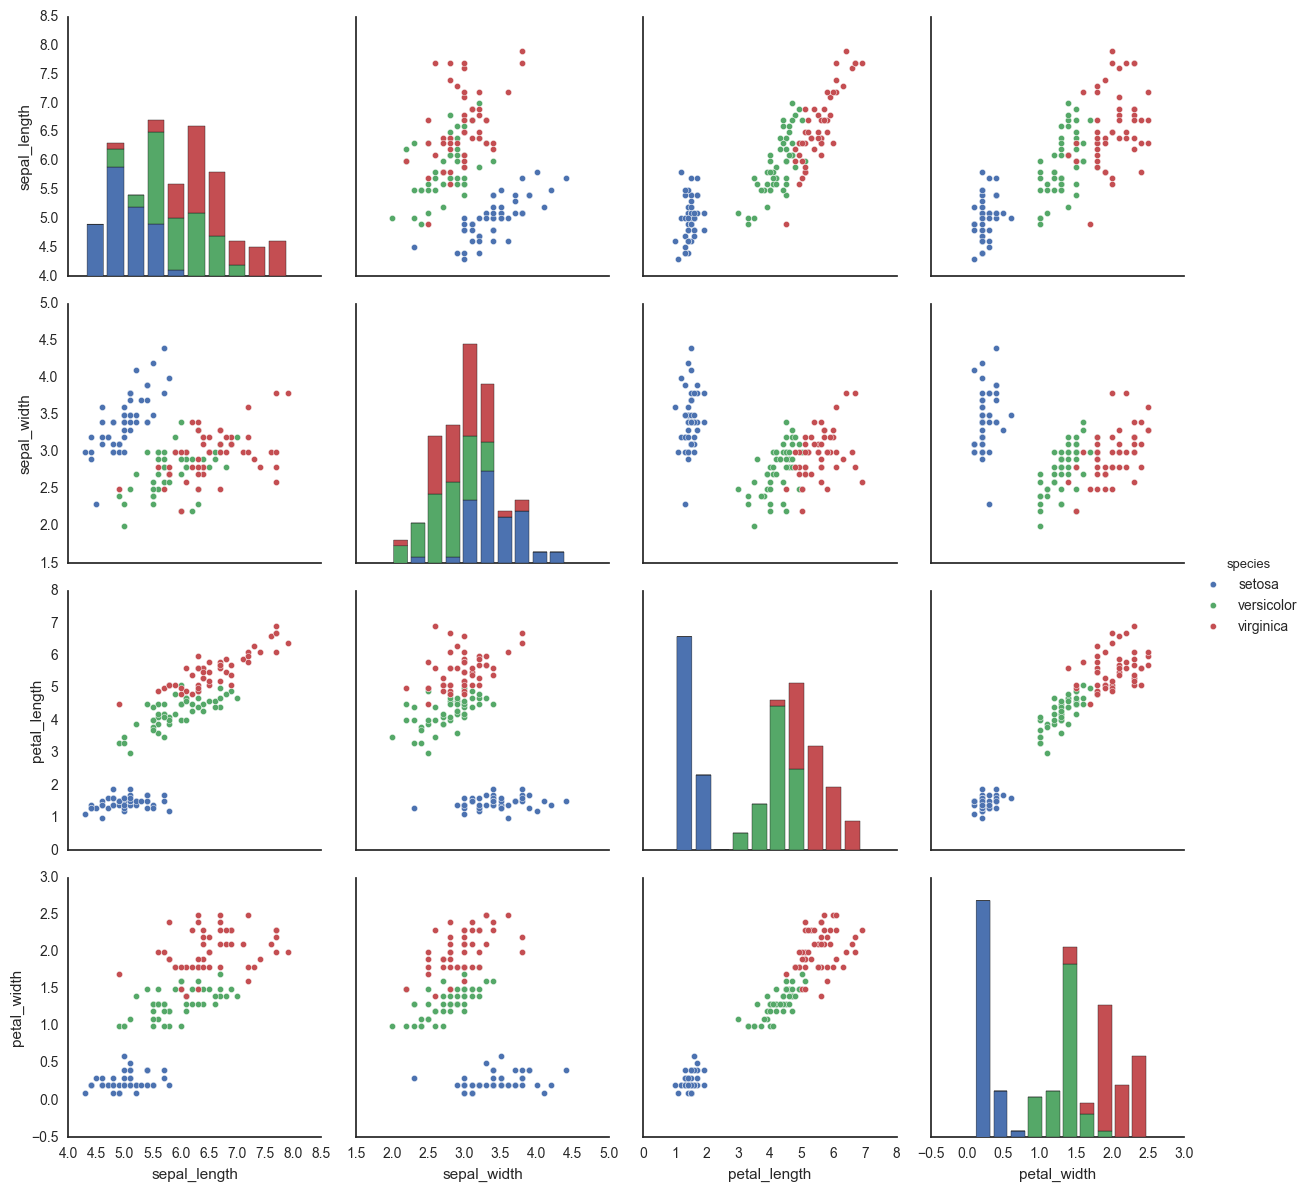

In [72]:
sns.pairplot(data.drop("id",axis=1),hue="species",size=3)

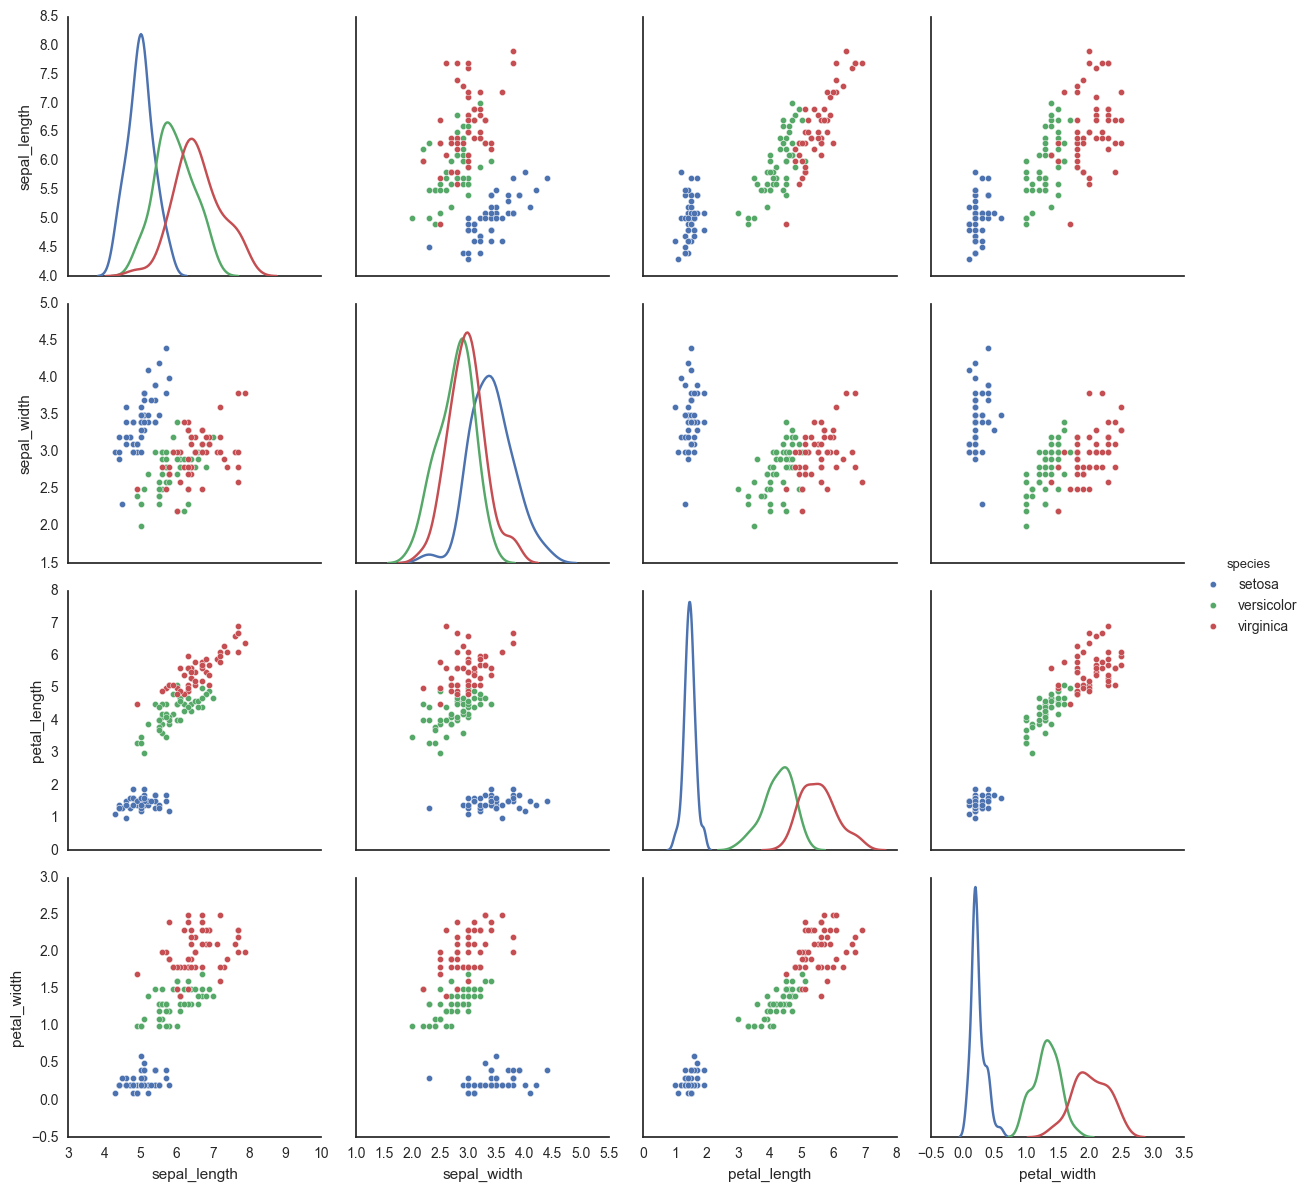

In [74]:
sns.pairplot(data.drop("id",axis=1),hue="species",size=3,diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7606BD2B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A7626667B8>]], dtype=object)

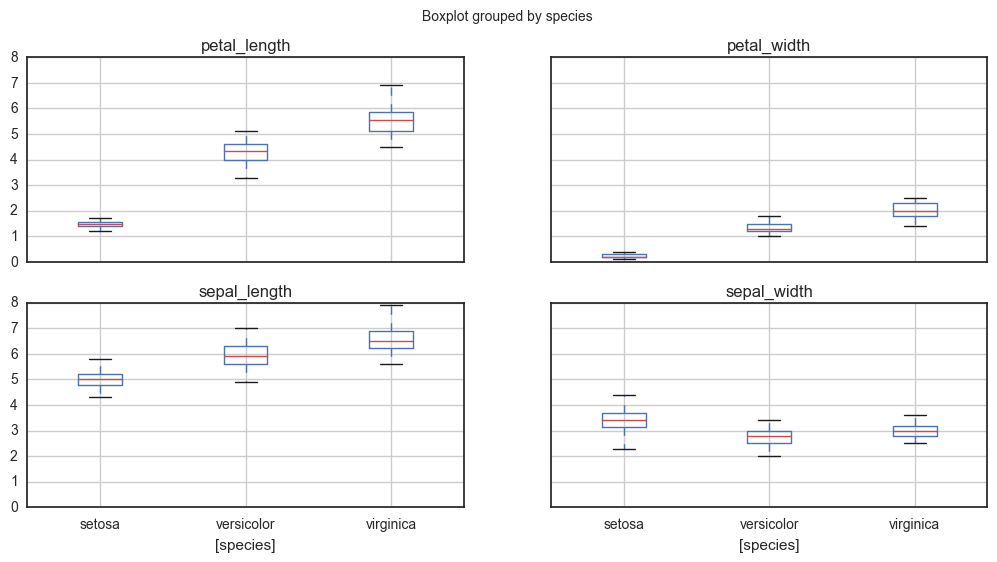

In [76]:
data.drop("id",axis=1).boxplot(by="species",figsize=(12,6))

In [80]:
#basic matplotlib
from pylab import *
X=np.linspace(-np.pi,np.pi,256,endpoint=True)#endpoint?端点？
C,S=np.cos(X),np.sin(X)

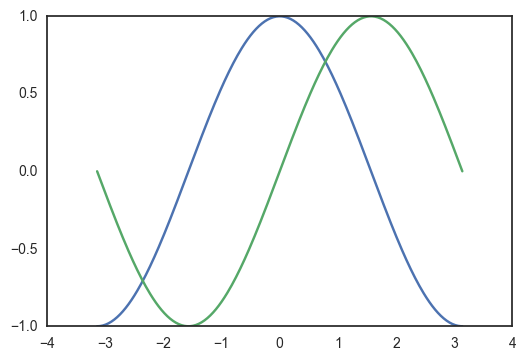

In [82]:
plot(X,C)
plot(X,S)
show()

([<matplotlib.axis.YTick at 0x1a764f46a58>,
 <a list of 5 Text yticklabel objects>)

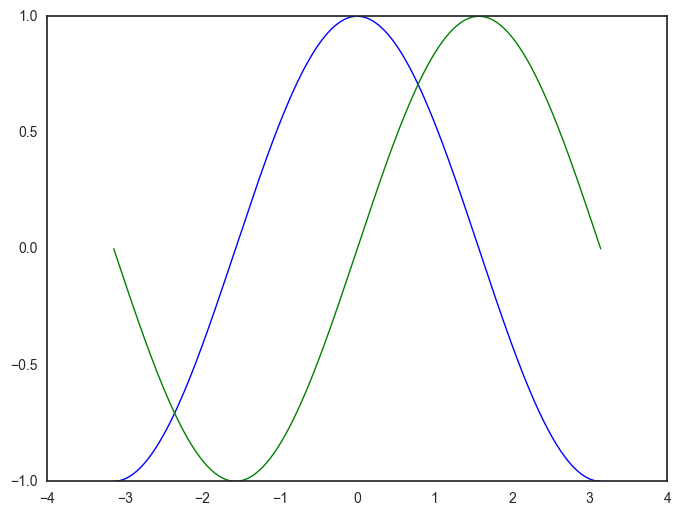

In [95]:
figure(figsize=(8,6),dpi=80)
subplot(111)
plot(X,C,color="blue",linewidth=1.0,linestyle="-")
plot(X,S,color="green",linewidth=1.0,linestyle="-")
xlim(-4.0,4.0)
xticks(np.linspace(-4,4,9,endpoint=True))
ylim(-1.0,1.0)
yticks(np.linspace(-1,1,5,endpoint=True))

AttributeError: Unknown property label_fontsize

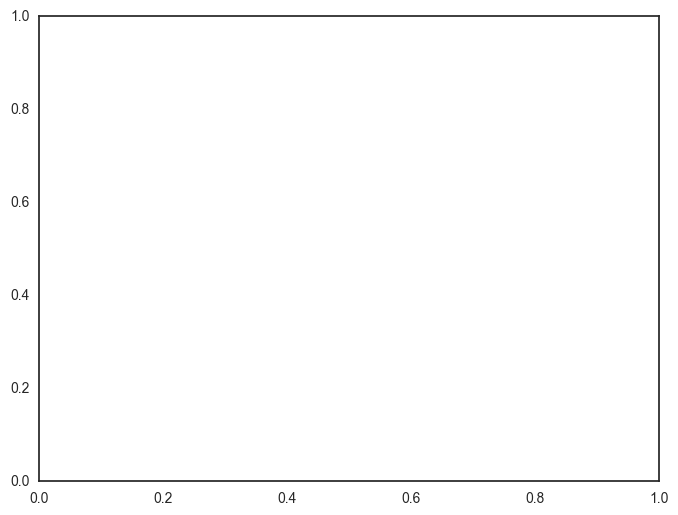

In [148]:
figure(figsize=(8,6),dpi=80)
subplot(111)
plot(X,C,color="blue",linewidth=2.5,linestyle="-",label="cos")
plot(X,S,color="red",linewidth=2.5,linestyle="-",label="sin")
xmin,xmax=X.min(),X.max()
ymin,ymax=S.min(),S.max()
dx=(xmax-xmin)*0.2
dy=(ymax-ymin)*0.2
xlim(xmin-dx,xmax+dx)
#xticks(np.linspace(-4,4,9,endpoint=True))
xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[r"$-\pi$",r"$-\frac{\pi}{2}$","0",r"$\frac{\pi}{2}$",r"$\pi$"])
ylim(ymin-dy,ymax+dy)
#yticks(np.linspace(-1,1,5,endpoint=True))
yticks([-1,0,1])
ax=gca()
ax.spines['right'].set_color('none')#去掉右，上脊柱
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')#移动脊柱
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
legend(loc="upper left")
t=2*np.pi/3
plot([t,t],[0,np.cos(t)],color='blue',linewidth=2.5,linestyle="--")
scatter([t,],[np.cos(t),],50,color='blue')
annotate(r"$\cos(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$",
         xy=(t,np.cos(t)),xycoords='data',xytext=(-90,-50),textcoords='offset points',
        fontsize=16,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

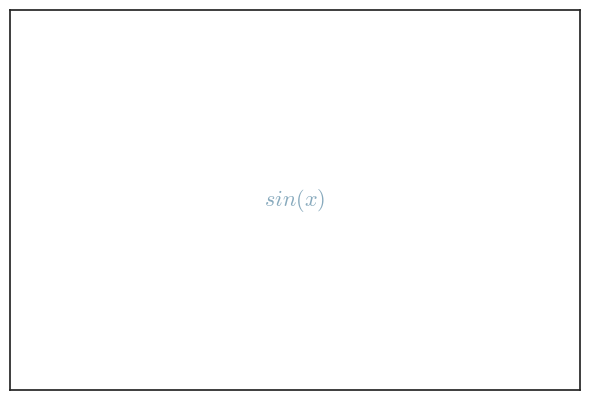

In [166]:
eq=r"$sin(x)$"
plt.axes([0.025,0.025,0.95,0.95])
plt.text(0.5,0.5,eq,ha='center',va='center',color="#11557c",
         alpha=0.5,transform=plt.gca().transAxes,
         fontsize=16,clip_on=True)

plt.xticks([]), plt.yticks([])